## Question 4

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as sfft
from matplotlib import image as mpimg
from scipy import signal

## Part A

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_20980\2301664680.py:24: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


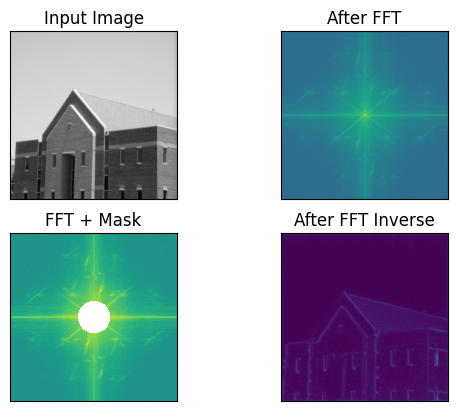

In [3]:
import cv2 # Python opencv-python version==4.7.1.78

img = cv2.imread('house.png', 0) 
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)  # center

# Circular HPF mask, center circle is 0, remaining all ones

mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0

# Apply mask and inverse DFT
fshift = dft_shift * mask

fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(magnitude_spectrum, cmap='viridis')
plt.title('After FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(fshift_mask_mag, cmap='viridis')
plt.title('FFT + Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(img_back, cmap='viridis')
plt.title('After FFT Inverse'), plt.xticks([]), plt.yticks([])
plt.show()


## Part B

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_20980\3829001135.py:6: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  kernel = np.outer(signal.gaussian(kernel_size[0], 5), signal.gaussian(kernel_size[1], 5))


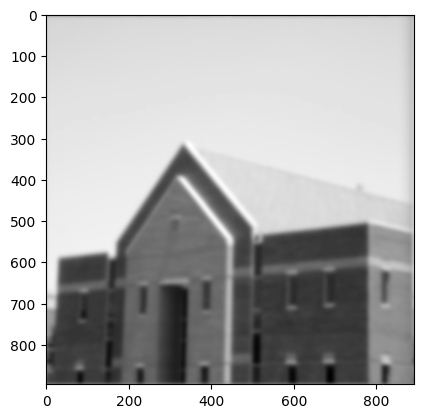

In [4]:
img = mpimg.imread('house.png')
img_gray = np.mean(img, axis=-1)  # Convert to grayscale

# Create a Gaussian filter kernel
kernel_size = img_gray.shape
kernel = np.outer(signal.gaussian(kernel_size[0], 5), signal.gaussian(kernel_size[1], 5))

# Resize the kernel to match the size of the input image
kernel = np.pad(kernel, ((0, kernel_size[0] - kernel.shape[0]), (0, kernel_size[1] - kernel.shape[1])))

# Shift the kernel to the frequency domain
kf = sfft.fft2(sfft.ifftshift(kernel))

# Perform Fourier transform on the grayscale image
imgf = sfft.fft2(img_gray)

# Apply the frequency domain kernel
img_b = imgf * kf

# Perform inverse Fourier transform
imgg = sfft.ifft2(img_b)

plt.imshow(np.abs(imgg), cmap='gray')
plt.show()

## Part C

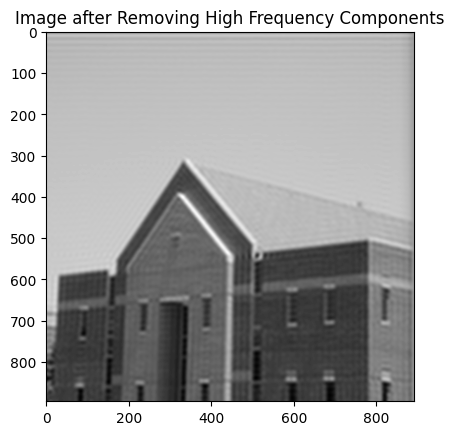

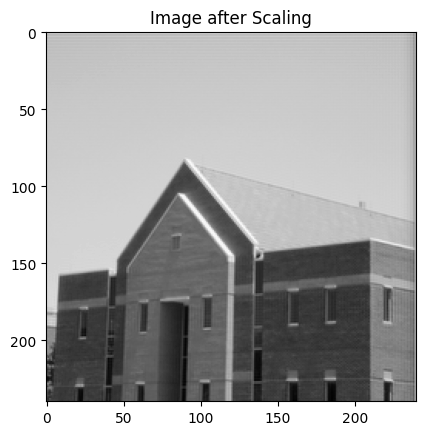

In [5]:
img = mpimg.imread("house.png")

# Convert the image to grayscale if it has color channels
if len(img.shape) == 3:
    img = np.mean(img, axis=-1)

# DCT
imgc = sfft.dct(sfft.dct(img, norm='ortho', axis=0), norm='ortho', axis=1)

# IDCT
img1 = sfft.idct(sfft.idct(imgc, norm='ortho', axis=0), norm='ortho', axis=1)

# Removing high frequency components
imgc1 = np.zeros_like(imgc)
imgc1[:120, :120] = imgc[:120, :120]

img1 = sfft.idct(sfft.idct(imgc1, norm='ortho', axis=0), norm='ortho', axis=1)

# Display the reconstructed image after removing high frequency components
plt.imshow(img1, cmap='gray')
plt.title('Image after Removing High Frequency Components')
plt.show()

# Scaling
imgc2 = imgc[:240, :240]

# IDCT after scaling
img1 = sfft.idct(sfft.idct(imgc2, norm='ortho', axis=0), norm='ortho', axis=1)

# Display the reconstructed image after scaling
plt.imshow(img1, cmap='gray')
plt.title('Image after Scaling')
plt.show()


## Part D

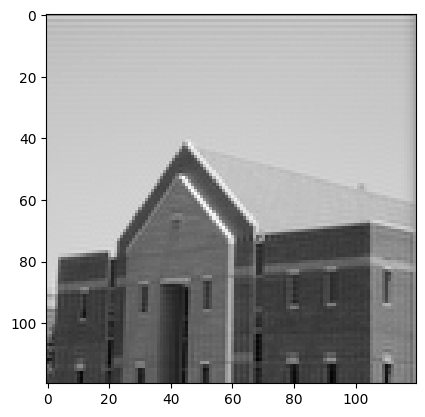

In [6]:
# DCT
imgc = sfft.dct((sfft.dct(img, norm='ortho')).T, norm='ortho')

# Remove high frequencies
mgc1 = np.zeros((360, 360))
imgc1 = imgc[:120, :120]

# IDCT
img1 = sfft.idct((sfft.idct(imgc1, norm='ortho')).T, norm='ortho')
plt.imshow(img1, cmap="gray")
plt.show()